In [1]:
from ga import *
import pickle
import matplotlib.pyplot as plt

## Practice Class 10

In [17]:
## Rosenbrock Differential
f_A
avg_real_dif, std_real_dif, max_real_dif, best_fitness_list_dif = ga_solve(250, f_A, [(-2.048, 2.048),(-2.048, 2.048)], F=0.5, n = 2, binary = False, minimization = True, n_generations = 10, pc=0.6, dif=True, precision_digits=4)

In [14]:
## Rosenbrock Genetic
avg_real, std_real, max_real, best_fitness_list = ga_solve(250, f_A, [(-2.048, 2.048),(-2.048, 2.048)], F=0.5, n = 2, binary = False, minimization = True, n_generations = 10, pc=0.6, dif=False, precision_digits=4)

In [24]:
## Rastrigin Differential
avg_real_dif, std_real_dif, max_real_dif, best_fitness_list_dif = ga_solve(250, f_B, [(-5.12, 5.12),(-5.12, 5.12)], F=0.5, n = 2, binary = False, minimization = True, n_generations = 10, pc=0.6, dif=True, precision_digits=4)


In [25]:
## Rosenbrock Genetic
avg_real, std_real, max_real, best_fitness_list = ga_solve(250, f_B, [(-5.12, 5.12),(-5.12, 5.12)], F=0.5, n = 2, binary = False, minimization = True, n_generations = 10, pc=0.6, dif=False, precision_digits=4)

### Practice Class 9

In [66]:
f_D = x1**2 + x2**2
constraints = [(-1,1),(-1,1)]

f_D  = f_D + 3 * sp.Max(0, x1 - x2)**2 + 21 * sp.Abs(x1**2 + x2**2 - 0.5)**2

In [67]:
avg_real, std_real, max_real, best_fitness_list = ga_solve(100, f_D, constraints, n = 2, binary = False, minimization = True, n_generations = 15, pc=0.9, precision_digits=4)

In [69]:
f_orig = x1**2 + x2**2
last_best_individual =  np.array(best_fitness_list[-1])

In [70]:
-eval_sympy(f_orig, last_best_individual)+eval_sympy(f_D, last_best_individual)

0.011514147954708565

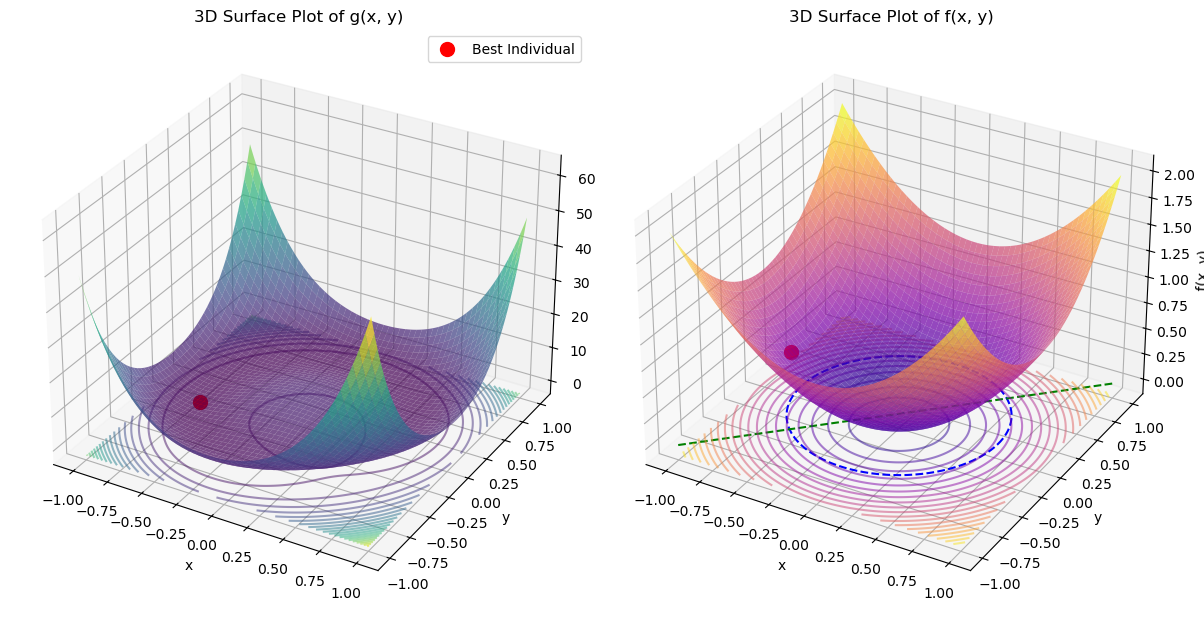

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import sys
A = 3
B = 21

def g(x, y, A, B):
    return (x**2 + y**2 + 
            A * np.maximum(0, x - y)**2 + 
            B * np.abs(x**2 + y**2 - 0.5)**2)

def f(x, y):
    return x**2 + y**2


# Create a grid of points
x = np.linspace(-1, 1, 400)  # x in [-1, 1]
y = np.linspace(-1, 1, 400)  # y in [-1, 1]
X, Y = np.meshgrid(x, y)

# Compute g(x, y) and f(x, y)
Z_g = g(X, Y, A, B)
Z_f = f(X, Y)
g_value_at_best_individual = max_real[-1]


circle_radius = np.sqrt(0.5)
theta = np.linspace(0, 2 * np.pi, 400)
circle_x = circle_radius * np.cos(theta)
circle_y = circle_radius * np.sin(theta)

# Constraint 2: Line x = y
line_x = np.linspace(-1, 1, 400)
line_y = line_x  # x = y

# Create the plots
fig = plt.figure(figsize=(12, 8))

# 3D Surface Plot for g(x, y)
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z_g, cmap='viridis', alpha=0.7)
ax1.set_title('3D Surface Plot of g(x, y)')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('g(x, y)')

ax1.scatter(last_best_individual[0], last_best_individual[1], g_value_at_best_individual, color='r', s=100, label='Best Individual')

ax1.legend()
# Contour Plot for g(x, y)
contour_g = ax1.contour(X, Y, Z_g, levels=20, zdir='z', offset=ax1.get_zlim()[0], cmap='viridis', alpha=0.5)

# 3D Surface Plot for f(x, y)
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, Z_f, cmap='plasma', alpha=0.7)
ax2.set_title('3D Surface Plot of f(x, y)')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('f(x, y)')
ax2.scatter(last_best_individual[0], last_best_individual[1], g_value_at_best_individual, color='r', s=100, label='Best Individual')

ax2.plot(circle_x, circle_y, 0, 'b--', label='$x^2 + y^2 = 1/2$')

# Add the line constraint x = y
ax2.plot(line_x, line_y, 0, 'g--', label='$x = y$')

# Contour Plot for f(x, y)
contour_f = ax2.contour(X, Y, Z_f, levels=20, zdir='z', offset=ax2.get_zlim()[0], cmap='plasma', alpha=0.5)

# Show plots
plt.tight_layout()
plt.show()

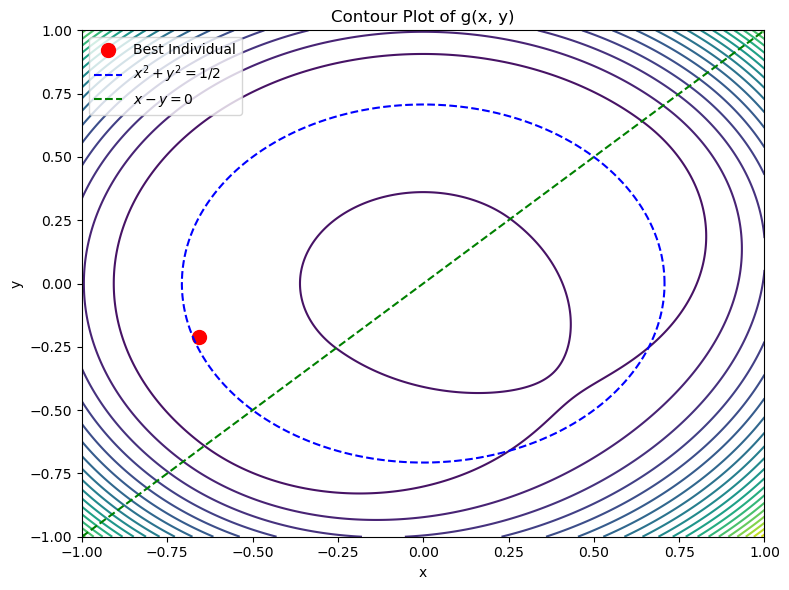

In [74]:
# Create the plot for top-down view (contour only)
fig = plt.figure(figsize=(8, 6))

# Contour Plot for g(x, y)
ax1 = fig.add_subplot(111)
contour_g = ax1.contour(X, Y, Z_g, levels=20, cmap='viridis')
ax1.set_title('Contour Plot of g(x, y)')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# Add the last best individual point to the contour plot
ax1.scatter(last_best_individual[0], last_best_individual[1], color='r', s=100, label='Best Individual')

# Add the circle constraint
ax1.plot(circle_x, circle_y, 'b--', label='$x^2 + y^2 = 1/2$')

# Add the line constraint x = y
ax1.plot(line_x, line_y, 'g--', label='$x - y = 0 $')

# Add legend for constraints and best individual
ax1.legend()

# Show plot
plt.tight_layout()
plt.show()

### First we are going to see approximately how many generations are needed for the algorithm to converge
#### f_A

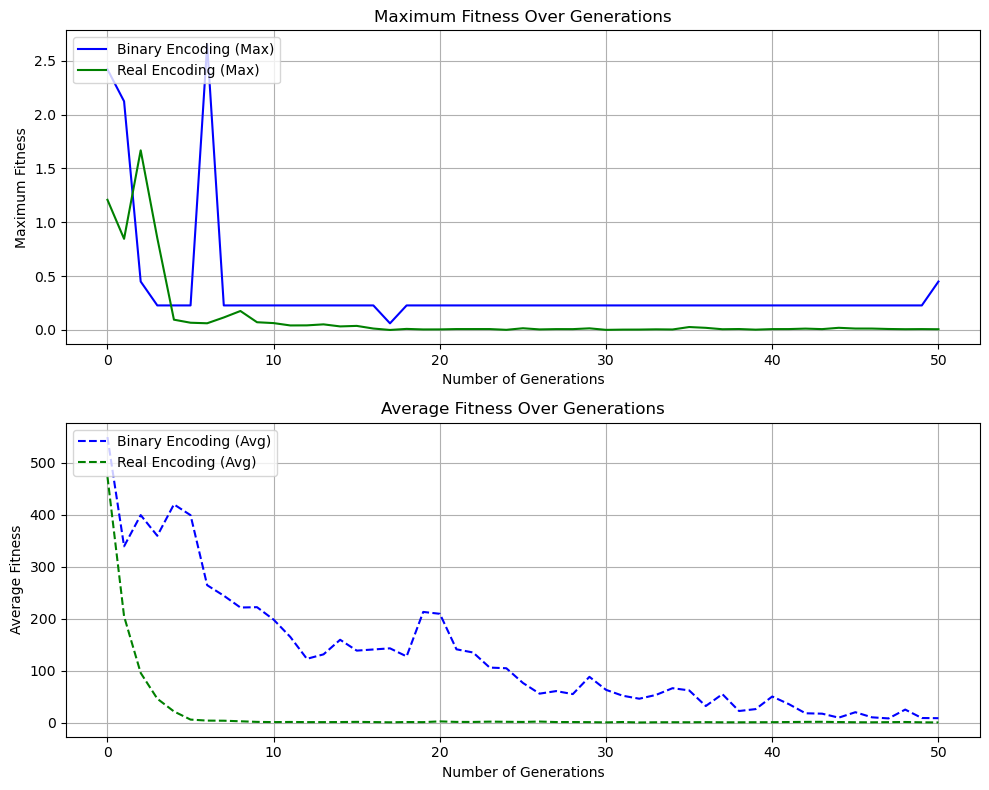

In [2]:
#print('Binary')
#avg_bin, std_bin, max_bin = ga_solve(100, f_A, [(-2.048, 2.048),(-2.048, 2.048)], n = 2, binary = True, minimization = True, 
#                                    n_generations = 50,pc=0.9, precision_digits=4)
#print('Real')
#avg_real, std_real, max_real = ga_solve(100, f_A, [(-2.048, 2.048),(-2.048, 2.048)], n = 2, binary = False, minimization = True, 
#                                    n_generations = 50,pc=0.9, precision_digits=4)
#
#data = {
#    'avg_bin': avg_bin,
#    'std_bin': std_bin,
#    'max_bin': max_bin,
#    'avg_real': avg_real,
#    'std_real': std_real,
#    'max_real': max_real
#}
#
#with open('pickles/ga_fa_results.pkl', 'wb') as f:
#    pickle.dump(data, f)

with open('pickles/ga_fa_results.pkl', 'rb') as f:
    data = pickle.load(f)

# Retrieve the variables
avg_bin = data['avg_bin']
std_bin = data['std_bin']
max_bin = data['max_bin']
avg_real = data['avg_real']
std_real = data['std_real']
max_real = data['max_real']

plot_convergence(max_bin,max_real,avg_bin,avg_real)

#### f_b

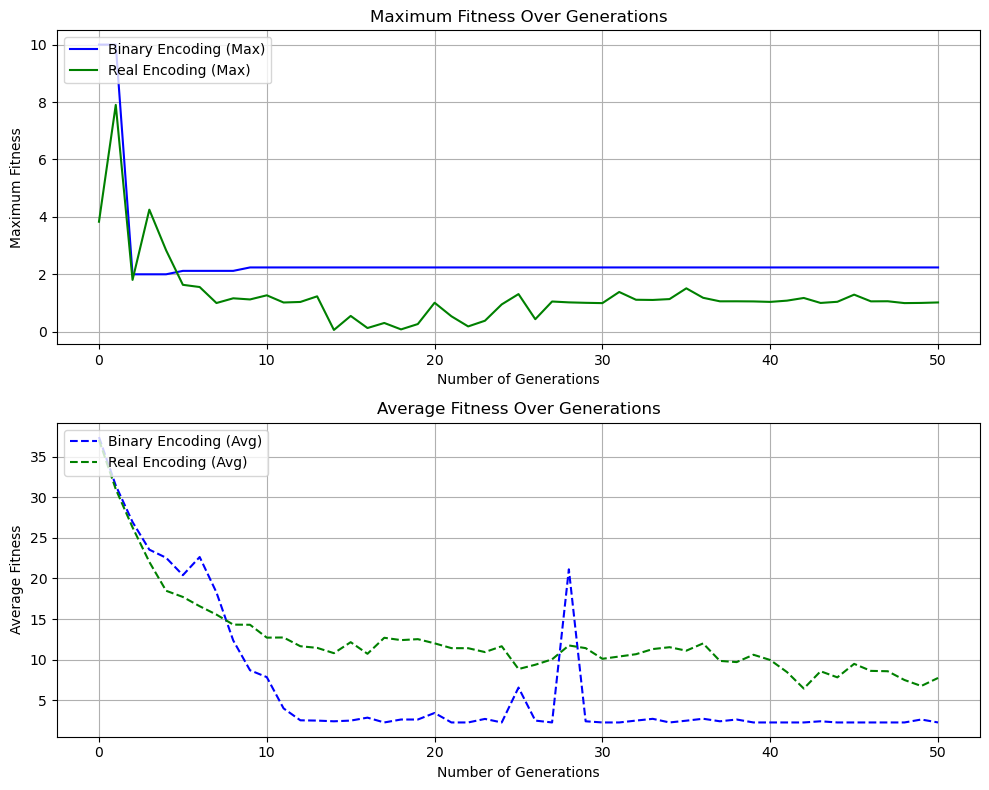

In [3]:
#print('Binary')
#avg_bin, std_bin, max_bin = ga_solve(100, f_B, [(-5.12, 5.12),(-5.12, 5.12)], n = 2, binary = True, minimization = True, 
#                                    n_generations = 50,pc=0.9, precision_digits=4)
#print('Real')
#avg_real, std_real, max_real = ga_solve(100, f_B, [(-5.12, 5.12),(-5.12, 5.12)], n = 2, binary = False, minimization = True, 
#                                    n_generations = 50,pc=0.9, precision_digits=4)
#
#data = {
#    'avg_bin': avg_bin,
#    'std_bin': std_bin,
#    'max_bin': max_bin,
#    'avg_real': avg_real,
#    'std_real': std_real,
#    'max_real': max_real
#}
#
#with open('pickles/ga_fb_results.pkl', 'wb') as f:
#    pickle.dump(data, f)

with open('pickles/ga_fb_results.pkl', 'rb') as f:
    data = pickle.load(f)

# Retrieve the variables
avg_bin = data['avg_bin']
std_bin = data['std_bin']
max_bin = data['max_bin']
avg_real = data['avg_real']
std_real = data['std_real']
max_real = data['max_real']

plot_convergence(max_bin,max_real,avg_bin,avg_real)

#### f_C

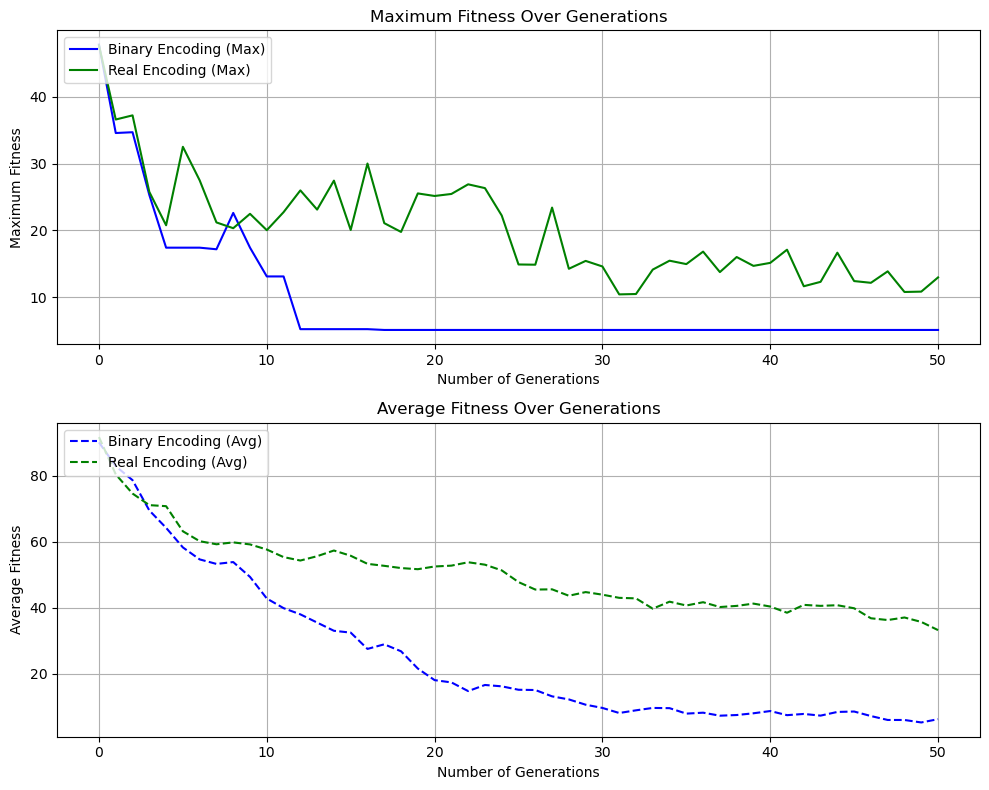

In [4]:
#print('Binary')
#avg_bin, std_bin, max_bin = ga_solve(100, f_C, [(-5.12, 5.12),(-5.12, 5.12),(-5.12, 5.12),(-5.12, 5.12),(-5.12, 5.12)], 
#                                    n = 5, binary = True, minimization = True, 
#                                    n_generations = 50,pc=0.9, precision_digits=4)
#print('Real')
#avg_real, std_real, max_real = ga_solve(100, f_C, [(-5.12, 5.12),(-5.12, 5.12),(-5.12, 5.12),(-5.12, 5.12),(-5.12, 5.12)], 
#                                    n = 5, binary = False, minimization = True, 
#                                    n_generations = 50,pc=0.9, precision_digits=4)
#
#data = {
#    'avg_bin': avg_bin,
#    'std_bin': std_bin,
#    'max_bin': max_bin,
#    'avg_real': avg_real,
#    'std_real': std_real,
#    'max_real': max_real
#}
#
#with open('pickles/ga_fc_results.pkl', 'wb') as f:
#    pickle.dump(data, f)

with open('pickles/ga_fc_results.pkl', 'rb') as f:
    data = pickle.load(f)

# Retrieve the variables
avg_bin = data['avg_bin']
std_bin = data['std_bin']
max_bin = data['max_bin']
avg_real = data['avg_real']
std_real = data['std_real']
max_real = data['max_real']

plot_convergence(max_bin,max_real,avg_bin,avg_real)

### Building Test Table

In [29]:
params = {
    "f_A": {
        "function": f_A,
        "constraints": [(-2.048, 2.048),(-2.048, 2.048)],
        "n": 2,
        "binary": 20,
        "real": 20
    },
    "f_B": {
        "function": f_B,
        "constraints": [(-5.12, 5.12),(-5.12, 5.12)],
        "n": 2,
        "binary": 15,
        "real": 15
    },
    "f_C": {
        "function": f_C,
        "constraints": [(-5.12, 5.12),(-5.12, 5.12),(-5.12, 5.12),(-5.12, 5.12),(-5.12, 5.12)],
        "n": 5,
        "binary": 15,
        "real": 30
    }
}

results = {}

In [34]:
for key in params.keys():
    results[key] = {}
    results[key]["binary"] = []
    results[key]["real"] = []
    for i in range(20):
        _, _, max_list =  ga_solve(100, params[key]["function"],params[key]["constraints"],n=params[key]["n"], binary=True,n_generations=params[key]["binary"])
        results[key]["binary"].append(max_list[-1])
        _, _, max_list =  ga_solve(100, params[key]["function"],params[key]["constraints"],n=params[key]["n"], binary=False,n_generations=params[key]["real"])
        results[key]["real"].append(max_list[-1])
    print(f"{key} done", end='\r')

In [37]:
def calculate_stats(data):
    return {
        "mean": np.mean(data),
        "std": np.std(data),
        "min": np.min(data),
        "max": np.max(data)
    }

table = "| Experiment | Binary Encoding (Test Problem 1) | Real Encoding (Test Problem 1) | Binary Encoding (Rastrigin, n=2) | Real Encoding (Rastrigin, n=2) | Binary Encoding (Rastrigin, n=5) | Real Encoding (Rastrigin, n=5) |\n"
table += "|------------|-------------------------------|-------------------------------|----------------------------------|----------------------------------|----------------------------------|----------------------------------|\n"

for i in range(20):
    table += f"| Experiment {i+1} | {results['f_A']['binary'][i]:.4f} | {results['f_A']['real'][i]:.4f} | {results['f_B']['binary'][i]:.4f} | {results['f_B']['real'][i]:.4f} | {results['f_C']['binary'][i]:.4f} | {results['f_C']['real'][i]:.4f} |\n"

stats_A_bin = calculate_stats(results["f_A"]["binary"])
stats_A_real = calculate_stats(results["f_A"]["real"])
stats_B_bin = calculate_stats(results["f_B"]["binary"])
stats_B_real = calculate_stats(results["f_B"]["real"])
stats_C_bin = calculate_stats(results["f_C"]["binary"])
stats_C_real = calculate_stats(results["f_C"]["real"])

table += f"| **Mean** | {stats_A_bin['mean']:.4f} | {stats_A_real['mean']:.4f} | {stats_B_bin['mean']:.4f} | {stats_B_real['mean']:.4f} | {stats_C_bin['mean']:.4f} | {stats_C_real['mean']:.4f} |\n"
table += f"| **Standard Deviation** | {stats_A_bin['std']:.4f} | {stats_A_real['std']:.4f} | {stats_B_bin['std']:.4f} | {stats_B_real['std']:.4f} | {stats_C_bin['std']:.4f} | {stats_C_real['std']:.4f} |\n"
table += f"| **Min** | {stats_A_bin['min']:.4f} | {stats_A_real['min']:.4f} | {stats_B_bin['min']:.4f} | {stats_B_real['min']:.4f} | {stats_C_bin['min']:.4f} | {stats_C_real['min']:.4f} |\n"
table += f"| **Max** | {stats_A_bin['max']:.4f} | {stats_A_real['max']:.4f} | {stats_B_bin['max']:.4f} | {stats_B_real['max']:.4f} | {stats_C_bin['max']:.4f} | {stats_C_real['max']:.4f} |\n"
print(table)

| Experiment | Binary Encoding (Test Problem 1) | Real Encoding (Test Problem 1) | Binary Encoding (Rastrigin, n=2) | Real Encoding (Rastrigin, n=2) | Binary Encoding (Rastrigin, n=5) | Real Encoding (Rastrigin, n=5) |
|------------|-------------------------------|-------------------------------|----------------------------------|----------------------------------|----------------------------------|----------------------------------|
| Experiment 1 | 0.2281 | 0.0010 | 2.1193 | 1.1834 | 5.1193 | 9.0403 |
| Experiment 2 | 0.0619 | 0.0147 | 2.0000 | 1.1147 | 5.3578 | 10.9384 |
| Experiment 3 | 0.4918 | 0.0010 | 2.1193 | 0.0173 | 5.2385 | 5.4890 |
| Experiment 4 | 0.2281 | 0.0327 | 2.1193 | 4.2745 | 5.1193 | 13.3960 |
| Experiment 5 | 0.2281 | 0.0100 | 2.0000 | 1.9460 | 5.1193 | 10.3362 |
| Experiment 6 | 2.1235 | 0.1968 | 2.0000 | 1.1415 | 5.2385 | 11.8279 |
| Experiment 7 | 9.6800 | 0.0061 | 2.2385 | 2.1704 | 5.2385 | 23.8760 |
| Experiment 8 | 0.0619 | 0.1569 | 2.1193 | 1.0439 | 5.2385 

In [36]:
with open('pickles/ga_all20_results.pkl', 'wb') as f:
    pickle.dump(results, f)

| Experiment | Binary Encoding (Test Problem 1) | Real Encoding (Test Problem 1) | Binary Encoding (Rastrigin, n=2) | Real Encoding (Rastrigin, n=2) | Binary Encoding (Rastrigin, n=5) | Real Encoding (Rastrigin, n=5) |
|------------|-------------------------------|-------------------------------|----------------------------------|----------------------------------|----------------------------------|----------------------------------|
| Experiment 1 | 0.2281 | 0.0010 | 2.1193 | 1.1834 | 5.1193 | 9.0403 |
| Experiment 2 | 0.0619 | 0.0147 | 2.0000 | 1.1147 | 5.3578 | 10.9384 |
| Experiment 3 | 0.4918 | 0.0010 | 2.1193 | 0.0173 | 5.2385 | 5.4890 |
| Experiment 4 | 0.2281 | 0.0327 | 2.1193 | 4.2745 | 5.1193 | 13.3960 |
| Experiment 5 | 0.2281 | 0.0100 | 2.0000 | 1.9460 | 5.1193 | 10.3362 |
| Experiment 6 | 2.1235 | 0.1968 | 2.0000 | 1.1415 | 5.2385 | 11.8279 |
| Experiment 7 | 9.6800 | 0.0061 | 2.2385 | 2.1704 | 5.2385 | 23.8760 |
| Experiment 8 | 0.0619 | 0.1569 | 2.1193 | 1.0439 | 5.2385 | 10.2270 |
| Experiment 9 | 0.2281 | 0.0208 | 2.0000 | 0.0301 | 5.2385 | 10.5525 |
| Experiment 10 | 4.8374 | 0.0061 | 2.0000 | 1.2927 | 5.3578 | 10.2177 |
| Experiment 11 | 2.7200 | 0.0166 | 2.0000 | 2.1218 | 5.4770 | 10.6052 |
| Experiment 12 | 0.0619 | 0.0294 | 2.1193 | 1.7253 | 5.3578 | 12.1124 |
| Experiment 13 | 0.0619 | 0.0020 | 2.1193 | 1.2290 | 5.1193 | 11.0205 |
| Experiment 14 | 0.2281 | 0.0617 | 2.1193 | 1.0101 | 5.1193 | 14.1252 |
| Experiment 15 | 0.4500 | 0.0017 | 2.2385 | 0.0927 | 5.4770 | 13.5228 |
| Experiment 16 | 5.2000 | 0.1471 | 2.0000 | 2.7282 | 5.1193 | 18.2738 |
| Experiment 17 | 0.4500 | 0.0308 | 2.0000 | 0.0333 | 5.2385 | 18.6986 |
| Experiment 18 | 0.4500 | 0.1808 | 2.1193 | 1.0354 | 5.1193 | 5.9167 |
| Experiment 19 | 0.0619 | 0.0008 | 2.1193 | 1.0079 | 5.3578 | 13.2085 |
| Experiment 20 | 0.2281 | 0.0012 | 2.1193 | 1.0291 | 5.2385 | 14.0911 |
| **Mean** | 1.4040 | 0.0459 | 2.0835 | 1.3114 | 5.2445 | 12.3738 |
| **Standard Deviation** | 2.4270 | 0.0646 | 0.0764 | 0.9923 | 0.1161 | 4.1262 |
| **Min** | 0.0619 | 0.0008 | 2.0000 | 0.0173 | 5.1193 | 5.4890 |
| **Max** | 9.6800 | 0.1968 | 2.2385 | 4.2745 | 5.4770 | 23.8760 |

#### Compare the best result obtained by the genetic algorithm (consider both binary and real encoding) against the result obtained by implementing a hill climber, gradient descent, and Newton method for Test problem 1 and Rastrigin function with n=2. Please indicate if using a genetic algorithm is beneficial in any test problem and explain why.

The algorithms hill climber, gradient descent, and Newton method all got stuck with the rastrigin n=2 in the f_x value of 8.00, while the GA implemented here got in average 2.08 and 1.31 for binary and real encoded values while the best performing individual in these GA implementation got 2.00 and 0.01, respectively. The real answer was 0, so the real encoded value for rastrigin n=2 had the closest run.
For the f_A function the hill climber, gradient descent, and Newton all got better solutions than the average binary encoded solution, but not than the best binary encoded solution. However, one clear disadvantage was that the running time of this GAs was very high (around 3 minutes per run with 15 generations), but for complex problem like rastrigin it is worth the time since the other search algorithms did not converge.

Solutions for the hill climber, gradient descent, and Newton algorithms on f_A (they all stuck in the starting point of f_B so no point on showing those plots)
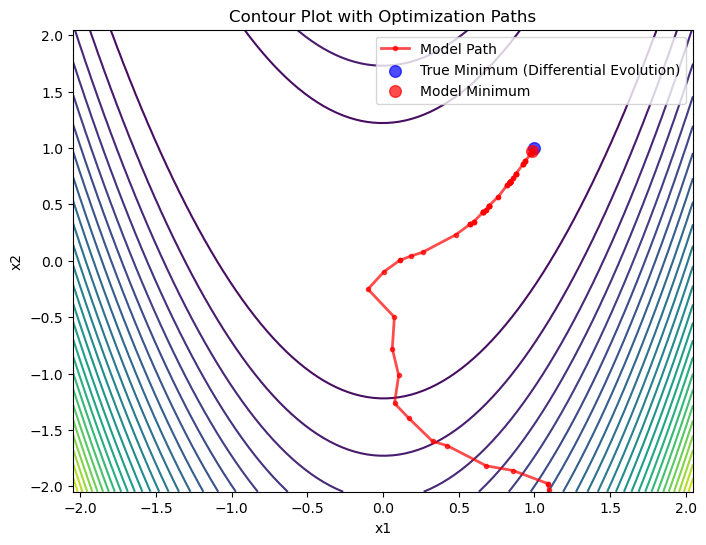

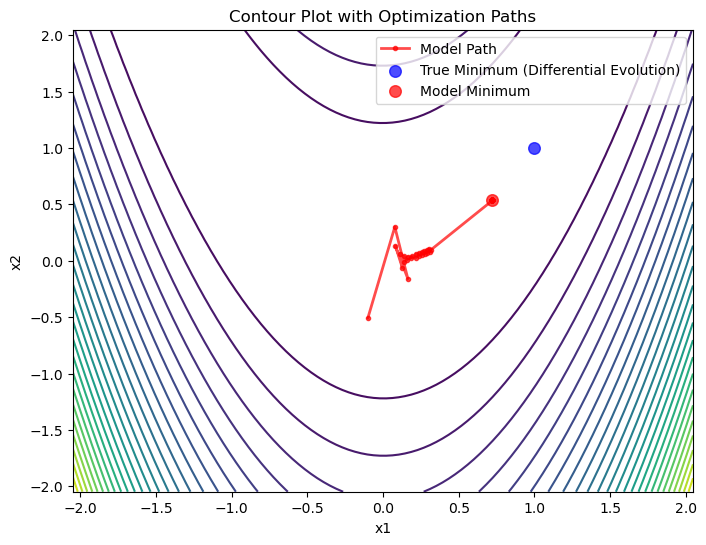

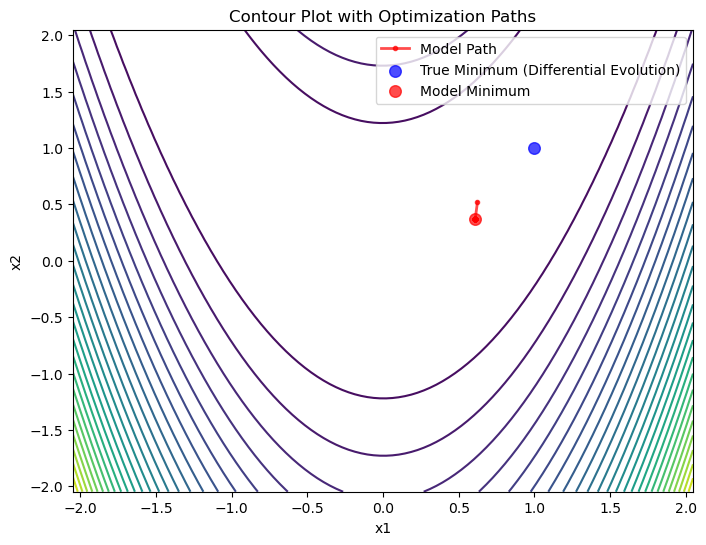

#### Design and discuss an automatic stopping criterion for your genetic algorithm implementation.
One kind of stopping criteria that could be to use is "n" number of generations without an improvement (in either the average or min/max  fitness) or a standard deviation fitness criteria stop (stopping when the population it is too homogeneous which could mean it found a solution in consensus) 

#### Explain: How could combine any derivative-based methods (gradient descent and Newton method) with your genetic algorithm?
You could use a stopping criteria that is based on the derivative of the problem function to determine if you are in a minimum/maximum. Another idea could be to use a derivative-based search with the population solutions as starting points, and the resulting point could be use as the off-spring of that population.